In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from neuropacks import NHP
from pyuoi.decomposition import UoI_CUR

%matplotlib inline

In [5]:
monkeys = ['indy_20160407_02',
           'indy_20160411_01',
           'indy_20160411_02',
           'indy_20160418_01',
           'indy_20160419_01'
]
paths = [os.path.join(os.environ['HOME'], 'data/NHP/' + monkeys[idx] + '.mat') for idx in range(len(monkeys))]

In [3]:
nhps = []
Ys = []
for path in paths:
    nhp = NHP(data_path=path)
    nhps.append(nhp)
    Y = nhp.get_response_matrix(
        bin_width=0.25, region='M1', transform=None
    )
    nz_indices = np.argwhere(Y.sum(axis=0) > 0).ravel()
    Y = Y[:, nz_indices]
    Ys.append(Y)

In [5]:
n_columns_uois = []
n_columns_uois_alt = []

for ii, Y in enumerate(Ys):
    print(ii)
    ks = np.arange(1, Y.shape[1])
    n_ks = ks.size
    
    n_columns_uoi = np.zeros(n_ks)
    n_columns_uoi_alt = np.zeros(n_ks)
    
    for k_idx, k in enumerate(ks):
        uoicur = UoI_CUR(
            n_boots=20,
            max_k=k,
            boots_frac=0.8
        )
    
        uoicur.fit(Y)
        n_columns_uoi[k_idx] = uoicur.column_indices_.size
        uoicur.fit(Y, ks=int(k))
        n_columns_uoi_alt[k_idx] = uoicur.column_indices_.size
    
    n_columns_uois.append(n_columns_uoi)
    n_columns_uois_alt.append(n_columns_uoi_alt)

0
1
2
3
4


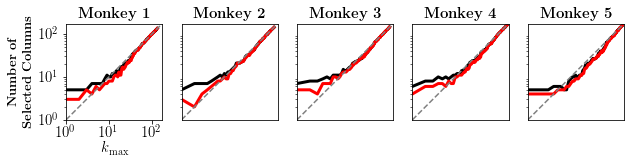

In [73]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for ii in range(5):
    axes[ii].plot(n_columns_uois[ii], color='k', linewidth=3, alpha=1.)
    axes[ii].plot(n_columns_uois_alt[ii], color='r', linewidth=3, alpha=1.)
    axes[ii].set_xscale('log')
    axes[ii].set_yscale('log')
    axes[ii].set_xlim(left=1, right=175)
    axes[ii].set_ylim(bottom=1, top=175)
    axes[ii].set_yticks([])
    axes[ii].set_xticks([])
    axes[ii].set_aspect('equal')
    axes[ii].set_title(r'\textbf{Monkey %s}' %(ii+1), fontsize=15)
    axes[ii].tick_params(labelsize=15)
    axes[ii].plot([1, 175], [1, 175], color='gray', linestyle='--')

axes[0].set_xticks([1, 10, 100])
axes[0].set_yticks([1, 10, 100])

axes[0].set_xlabel(r'$k_{\text{max}}$', fontsize=15)
axes[0].set_ylabel(r'\textbf{Number of}' '\n' r'\textbf{Selected Columns}', fontsize=13)
plt.savefig('uoi_vs_intersection_comparison.pdf', bbox_inches='tight')